In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data = pd.read_csv('loan.csv')
data.shape

(614, 13)

In [132]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [133]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Guessing game: Most important features: Income, credit history

In [134]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [135]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [136]:
data = data.drop('Loan_ID',axis = 1)

In [137]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [138]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [139]:
#missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [141]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [142]:
cat_cols.remove('Loan_Status') # Loan_Status is target, so remove from features
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

# Univariate Analysis

In [143]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [144]:
target = 'Loan_Status'

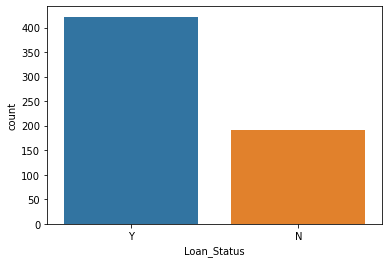

In [145]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

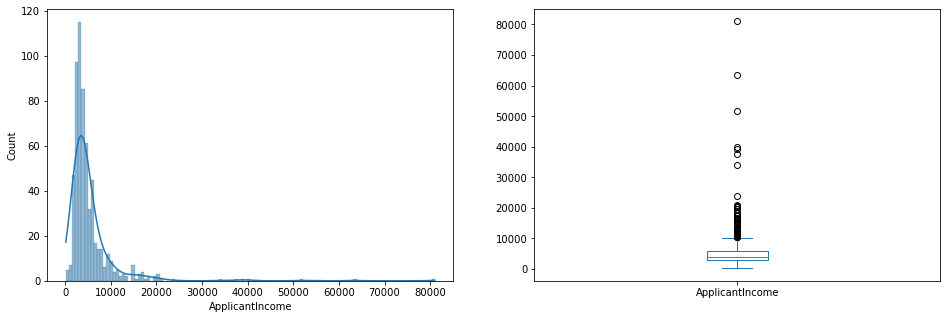

In [146]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"], kde=True)

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [147]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [148]:
from scipy.stats import ttest_ind

# H0: No relation between loan status and applicant income (same mean)
# Ha: There is a relation
a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]
ttest_ind(a, b)


Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [149]:
# T-test gave a counter intuitive result.
# Let us explore further

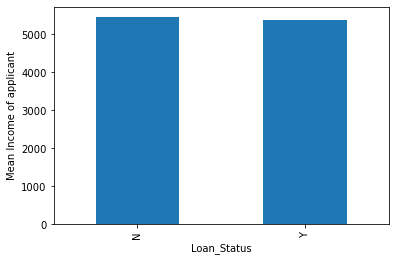

In [150]:
data.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

## Bin income

In [151]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']

In [152]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group) # Create new categorical column


In [153]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [154]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])


Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


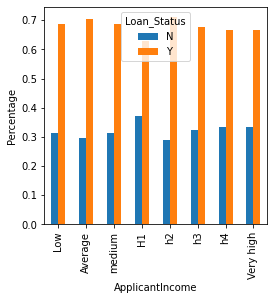

In [155]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [156]:
from scipy.stats import chi2_contingency

# H0: No relation between Income bina and loan status
# Ha: There is a relation
val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
print(val)
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


(1.2420001711303135,
 0.9899274842922701,
 7,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 12.50814332,  27.49185668],
        [  2.81433225,   6.18566775],
        [  0.93811075,   2.06188925]]))

In [157]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [158]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [159]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [160]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


<AxesSubplot:xlabel='TotalIncome_bin'>

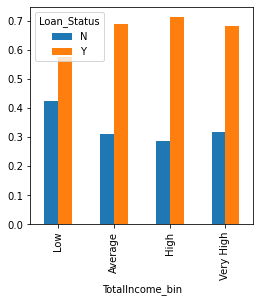

In [161]:
vals_n = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"], normalize="index")
vals_n.plot(kind="bar",figsize=(4,4))

In [162]:
chi2_contingency(vals) # chi_stat, p-value, dof, expec


(3.428480885250809,
 0.3301570564076713,
 3,
 array([[ 14.6970684 ,  32.3029316 ],
        [ 69.73289902, 153.26710098],
        [ 66.29315961, 145.70684039],
        [ 41.27687296,  90.72312704]]))

# Ability to pay EMI

In [163]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [164]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

In [165]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

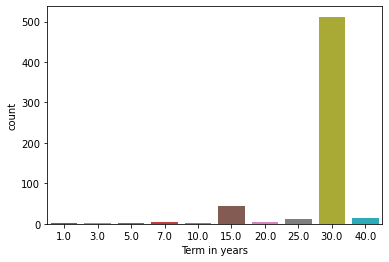

In [166]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

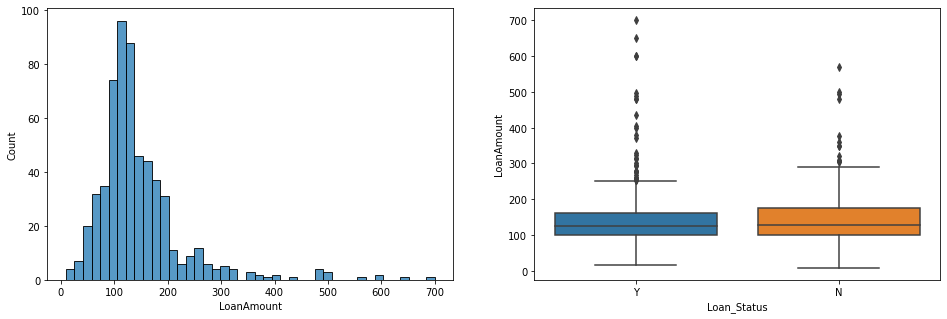

In [167]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [168]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']
# Crude approximation - ignoring interest
# This is in 1000's of dollars

In [169]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000


In [170]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12 # Crude approximation without interest
data.head()
# Multiplication by 1000 since units above were in 1000's of dollars
# Division by 12 to convert to month

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667


Ability to pay EMI--->  EMI < 20% of total income

In [171]:
data['Able_to_pay_EMI'] = (data['TotalIncome']*0.4 > data['EMI']).astype('int')


In [172]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1


<AxesSubplot:xlabel='Able_to_pay_EMI', ylabel='count'>

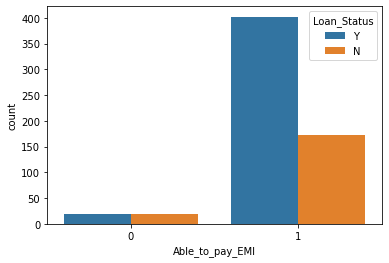

In [173]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [174]:
vals = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,19,20
1,173,402


In [175]:
chi2_contingency(vals)


(5.06370716479013,
 0.024431922578328144,
 1,
 array([[ 12.19543974,  26.80456026],
        [179.80456026, 395.19543974]]))

# Dependent column

In [176]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [177]:
data['Dependents'].replace('3+',3,inplace=True)

In [178]:
data['Dependents'] = data['Dependents'].astype('float')

In [179]:
data.dtypes

Gender                    object
Married                   object
Dependents               float64
Education                 object
Self_Employed             object
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area             object
Loan_Status               object
Income_bin              category
TotalIncome              float64
TotalIncome_bin         category
Loan_Amount_per_year     float64
EMI                      float64
Able_to_pay_EMI            int32
dtype: object

In [180]:
g_men = data.loc[(data["Married"] == "No") & (data["Gender"] == "Male")]["ApplicantIncome"]
u_women = data.loc[(data["Gender"] == "Female")]["ApplicantIncome"]

ttest_ind(g_men, u_women)

Ttest_indResult(statistic=1.1403012035198827, pvalue=0.25529750307622384)

In [181]:
g_men = data.loc[(data["Married"] == "No") & (data["Gender"] == "Male") & (data["Education"] == "Graduate")]["ApplicantIncome"]
u_women = data.loc[(data["Gender"] == "Female") & (data["Education"] == "Graduate")]["ApplicantIncome"]

ttest_ind(g_men, u_women)

Ttest_indResult(statistic=1.75360894634636, pvalue=0.0811185605889597)

In [198]:
data['GraduateUnmarriedMen'] = (data["Gender"] == "Male") & (data["Married"] == "No") & (data["Education"] == "Graduate")

# Load the data for graduate women

data['GraduateWomen'] = (data["Gender"] == "Female") & (data["Education"] == "Graduate")


data = data[(data['GraduateUnmarriedMen'] == True) | (data['GraduateWomen'] == True)]

contingency = pd.crosstab(data['GraduateUnmarriedMen'], data['Loan_Status']).values

print('\n',contingency,'\n')

p_value = chi2_contingency(contingency)[1]

print('p-value:',round(p_value,2))

# pd.crosstab(index=data["Loan_Status"], columns = g_men[""])


 [[28 45]
 [31 53]] 

p-value: 0.98


In [183]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])

In [184]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN,0,NaN
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1,11967.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1,10198.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1,9943.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1,13423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,Average,2900.0,Low,2.366667,197.222222,1,10113.0
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,medium,4106.0,Average,2.666667,222.222222,1,11226.0
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,h2,8312.0,Very High,8.433333,702.777778,1,15831.0
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,H1,7583.0,High,6.233333,519.444444,1,15144.0


In [185]:
data.dropna(inplace = True)

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1,11967.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1,10198.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1,9943.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1,13423.0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,30.0,1.0,Urban,Y,medium,9613.0,Very High,8.900000,741.666667,1,13218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,Average,2900.0,Low,2.366667,197.222222,1,10113.0
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,medium,4106.0,Average,2.666667,222.222222,1,11226.0
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,h2,8312.0,Very High,8.433333,702.777778,1,15831.0
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,H1,7583.0,High,6.233333,519.444444,1,15144.0


In [199]:
data["Separator"] = (data["NewFeature"] > (0.25 * data["NewFeature"].mean())).astype('int')

In [200]:
data["Separator"] = data["Separator"].astype("object")

In [201]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Separator,GraduateUnmarriedMen,GraduateWomen
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,...,medium,6000.0,High,4.700000,391.666667,1,13423.0,1,True,False
13,Male,No,0.0,Graduate,No,1853,2840.0,114.0,30.0,1.0,...,Low,4693.0,Average,3.800000,316.666667,1,9195.0,1,True,False
15,Male,No,0.0,Graduate,No,4950,0.0,125.0,30.0,1.0,...,medium,4950.0,Average,4.166667,347.222222,1,12325.0,1,True,False
17,Female,No,0.0,Graduate,No,3510,0.0,76.0,30.0,0.0,...,Average,3510.0,Average,2.533333,211.111111,1,3738.0,1,False,True
31,Male,No,0.0,Graduate,No,3167,0.0,74.0,30.0,1.0,...,Average,3167.0,Average,2.466667,205.555556,1,10389.0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Female,Yes,0.0,Graduate,No,3166,0.0,36.0,30.0,1.0,...,Average,3166.0,Average,1.200000,100.000000,1,10274.0,1,False,True
603,Male,No,0.0,Graduate,No,3676,4301.0,172.0,30.0,1.0,...,Average,7977.0,High,5.733333,477.777778,1,11192.0,1,True,False
604,Female,Yes,1.0,Graduate,No,12000,0.0,496.0,30.0,1.0,...,h3,12000.0,Very High,16.533333,1377.777778,1,20488.0,1,False,True
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,30.0,1.0,...,Average,2900.0,Low,2.366667,197.222222,1,10113.0,1,False,True


In [205]:
val = pd.crosstab(index=data["Separator"], columns=data["Loan_Status"])

val

Loan_Status,N,Y
Separator,,
0,4,1
1,55,97


In [203]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Separator,GraduateUnmarriedMen,GraduateWomen
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,...,medium,6000.0,High,4.700000,391.666667,1,13423.0,1,True,False
13,Male,No,0.0,Graduate,No,1853,2840.0,114.0,30.0,1.0,...,Low,4693.0,Average,3.800000,316.666667,1,9195.0,1,True,False
15,Male,No,0.0,Graduate,No,4950,0.0,125.0,30.0,1.0,...,medium,4950.0,Average,4.166667,347.222222,1,12325.0,1,True,False
17,Female,No,0.0,Graduate,No,3510,0.0,76.0,30.0,0.0,...,Average,3510.0,Average,2.533333,211.111111,1,3738.0,1,False,True
31,Male,No,0.0,Graduate,No,3167,0.0,74.0,30.0,1.0,...,Average,3167.0,Average,2.466667,205.555556,1,10389.0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Female,Yes,0.0,Graduate,No,3166,0.0,36.0,30.0,1.0,...,Average,3166.0,Average,1.200000,100.000000,1,10274.0,1,False,True
603,Male,No,0.0,Graduate,No,3676,4301.0,172.0,30.0,1.0,...,Average,7977.0,High,5.733333,477.777778,1,11192.0,1,True,False
604,Female,Yes,1.0,Graduate,No,12000,0.0,496.0,30.0,1.0,...,h3,12000.0,Very High,16.533333,1377.777778,1,20488.0,1,False,True
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,30.0,1.0,...,Average,2900.0,Low,2.366667,197.222222,1,10113.0,1,False,True


In [204]:
chi2_contingency(val)

(2.314107586611808,
 0.12820486089939254,
 1,
 array([[ 1.87898089,  3.12101911],
        [57.12101911, 94.87898089]]))